<a href="https://colab.research.google.com/github/dhivyapm/CS7357/blob/master/NN_HW_3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

df = pd.read_csv('https://raw.githubusercontent.com/kevinsuo/CS7357/master/project/3/data/MNIST.csv',sep=',')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
995,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
def evaluate_model(X_train, X_test, y_train, y_test):
  input_shape = (28, 28, 1)
  model = Sequential()
  #convolutional layer with rectified linear unit activation
  model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #flatten since too many dimensions, we only want a classification output
  model.add(Flatten())
  #fully connected to get all relevant data
  model.add(Dense(32, activation='relu'))
  #output a softmax to squash the matrix into output probabilities
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
  result  =  model.fit(x=X_train,y=y_train,validation_data = (X_test,y_test), epochs=5)
  model.evaluate(X_test, y_test)
  return result


In [129]:
n_folds=5
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#save the model history in a list after fitting so that we can plot later
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
num_folds = 5
model_history = []
for train, test in kfold.split(X, y):
    print("Training on Fold: ",i+1)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    X_train = X_train/255
    X_test = X_test/255
    model_history.append(evaluate_model(X_train, X_test, y_train, y_test))
    print("\n")

Training on Fold:  1
Epoch 1/5
26/26 [==============================] - 1s 21ms/step - loss: 1.9585 - acc: 0.3913 - val_loss: 0.9660 - val_acc: 0.8111
Epoch 2/5
26/26 [==============================] - 0s 15ms/step - loss: 0.7413 - acc: 0.8419 - val_loss: 0.6532 - val_acc: 0.8444
Epoch 3/5
26/26 [==============================] - 0s 15ms/step - loss: 0.4284 - acc: 0.8682 - val_loss: 0.5284 - val_acc: 0.8667
Epoch 4/5
26/26 [==============================] - 0s 15ms/step - loss: 0.3326 - acc: 0.8794 - val_loss: 0.5609 - val_acc: 0.8444
Epoch 5/5
3/3 [==============================] - 0s 7ms/step - loss: 0.5639 - acc: 0.8444


Training on Fold:  2
Epoch 1/5
23/23 [==============================] - 1s 23ms/step - loss: 2.3030 - acc: 0.1019 - val_loss: 2.3056 - val_acc: 0.0864
Epoch 2/5
23/23 [==============================] - 0s 16ms/step - loss: 2.3031 - acc: 0.0927 - val_loss: 2.2959 - val_acc: 0.1111
Epoch 3/5
23/23 [==============================] - 0s 15ms/step - loss: 2.2927 - acc: 

In [148]:
num_folds=5
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#save the model history in a list after fitting so that we can plot later
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
num_folds = 5
fold_no = 1
model_history = []
for train, test in kfold.split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    X_train = X_train/255
    X_test = X_test/255
    input_shape = (28, 28, 1)
    model = Sequential()
    #convolutional layer with rectified linear unit activation
    model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #flatten since too many dimensions, we only want a classification output
    model.add(Flatten())
    #fully connected to get all relevant data
    model.add(Dense(32, activation='relu'))
    #output a softmax to squash the matrix into output probabilities
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    history =  model.fit(x=X_train,y=y_train,validation_data = (X_test,y_test), epochs=5)
    scores = model.evaluate(X_test, y_test)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    print('-'*120)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    model_history.append(history)
      # Increase fold number
    fold_no = fold_no + 1
print('-'*80)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('-'*80)
  print(f' Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('-'*80)
print(f'Maximun accuracy from all folds: {np.max(acc_per_fold)}')
print(f'Minimun loss from all folds: {np.min(loss_per_fold)}')


Epoch 1/5
29/29 [==============================] - 1s 20ms/step - loss: 1.9989 - acc: 0.3064 - val_loss: 0.9603 - val_acc: 0.7700
Epoch 2/5
29/29 [==============================] - 0s 15ms/step - loss: 0.8790 - acc: 0.7643 - val_loss: 0.6438 - val_acc: 0.8200
Epoch 3/5
29/29 [==============================] - 0s 14ms/step - loss: 0.4494 - acc: 0.8508 - val_loss: 0.6176 - val_acc: 0.8300
Epoch 4/5
29/29 [==============================] - 0s 15ms/step - loss: 0.3792 - acc: 0.8851 - val_loss: 0.4976 - val_acc: 0.8800
Epoch 5/5
4/4 [==============================] - 0s 6ms/step - loss: 0.4795 - acc: 0.8800
Score for fold 1: loss of 0.4795266389846802; acc of 87.99999952316284%
------------------------------------------------------------------------------------------------------------------------
Epoch 1/5
29/29 [==============================] - 1s 20ms/step - loss: 1.9390 - acc: 0.3693 - val_loss: 1.0186 - val_acc: 0.6800
Epoch 2/5
29/29 [==============================] - 0s 15ms/step - l

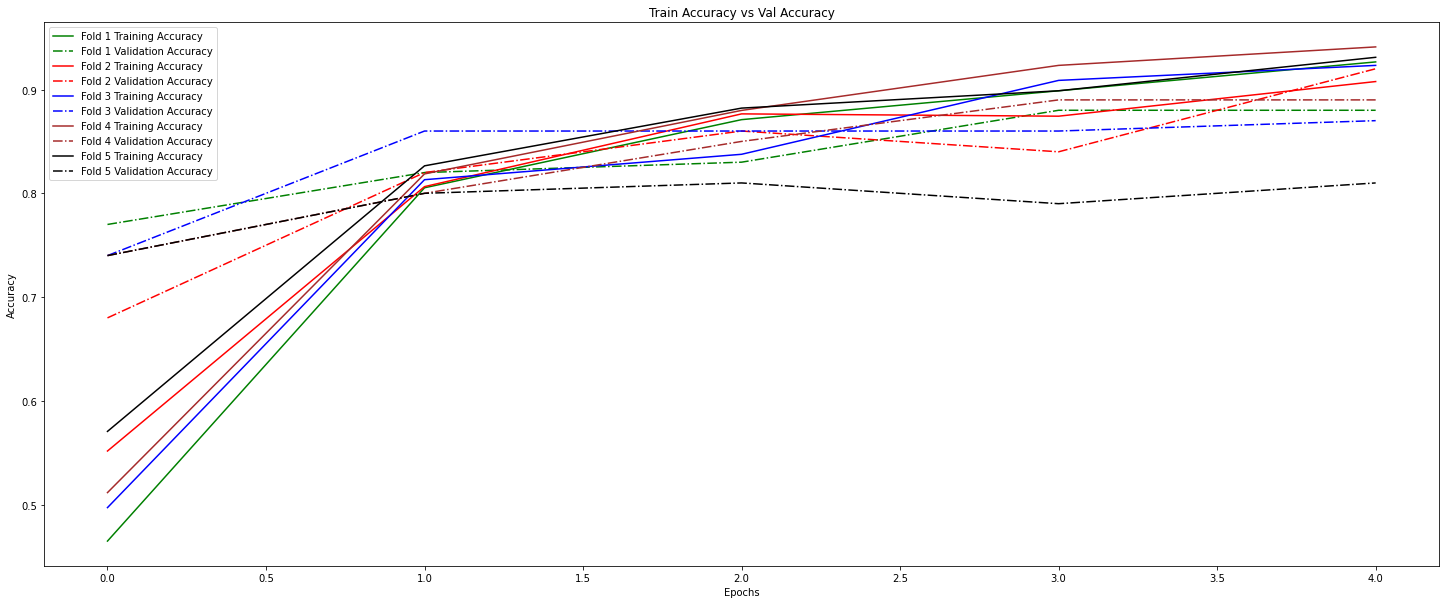

In [149]:
plt.figure(figsize=(25,10))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history[0].history['acc'], label='Fold 1 Training Accuracy ', color='green')
plt.plot(model_history[0].history['val_acc'], label='Fold 1 Validation Accuracy', color='green', linestyle = "dashdot")
plt.plot(model_history[1].history['acc'], label='Fold 2 Training Accuracy', color='red', )
plt.plot(model_history[1].history['val_acc'], label='Fold 2 Validation Accuracy', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['acc'], label='Fold 3 Training Accuracy', color='blue', )
plt.plot(model_history[2].history['val_acc'], label='Fold 3 Validation Accuracy', color='blue', linestyle = "dashdot")
plt.plot(model_history[3].history['acc'], label='Fold 4 Training Accuracy', color='brown', )
plt.plot(model_history[3].history['val_acc'], label='Fold 4 Validation Accuracy', color='brown', linestyle = "dashdot")
plt.plot(model_history[4].history['acc'], label='Fold 5 Training Accuracy', color='black', )
plt.plot(model_history[4].history['val_acc'], label='Fold 5 Validation Accuracy', color='black', linestyle = "dashdot")    
plt.legend()
plt.show()

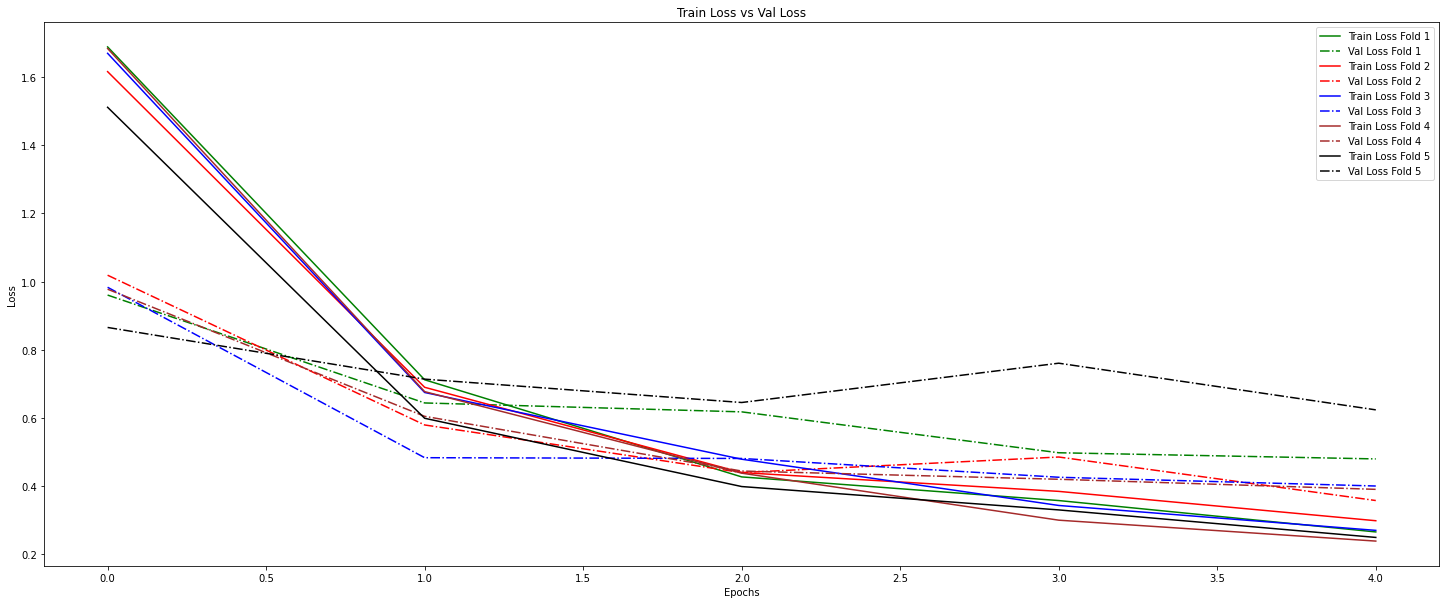

In [150]:
plt.figure(figsize=(25,10))
plt.title('Train Loss vs Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(model_history[0].history['loss'], label='Train Loss Fold 1', color='green')
plt.plot(model_history[0].history['val_loss'], label='Val Loss Fold 1', color='green', linestyle = "dashdot")
plt.plot(model_history[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(model_history[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['loss'], label='Train Loss Fold 3', color='blue', )
plt.plot(model_history[2].history['val_loss'], label='Val Loss Fold 3', color='blue', linestyle = "dashdot")
plt.plot(model_history[3].history['loss'], label='Train Loss Fold 4', color='brown', )
plt.plot(model_history[3].history['val_loss'], label='Val Loss Fold 4', color='brown', linestyle = "dashdot")
plt.plot(model_history[4].history['loss'], label='Train Loss Fold 5', color='black', )
plt.plot(model_history[4].history['val_loss'], label='Val Loss Fold 5', color='black', linestyle = "dashdot")    
plt.legend()
plt.show()